In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [2]:
env='InvertedPendulum-v4'

In [3]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [4]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(84129, 17)


In [5]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(79894, 17)


In [6]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,23-06-2023 14:49:21,15,0,15,0.000746,1,16,True,15,15.000000,15.000000,15.000000,15.000000,COMPER
1,1,2,InvertedPendulum-v4,23-06-2023 14:49:25,21,0,21,0.001044,2,7,True,6,10.500000,10.500000,10.500000,10.500000,COMPER
2,1,3,InvertedPendulum-v4,23-06-2023 14:49:28,25,0,25,0.001243,3,5,True,4,8.333333,8.333333,8.333333,8.333333,COMPER
3,1,4,InvertedPendulum-v4,23-06-2023 14:49:31,29,0,29,0.001441,4,5,True,4,7.250000,7.250000,7.250000,7.250000,COMPER
4,1,5,InvertedPendulum-v4,23-06-2023 14:49:34,32,0,32,0.001591,5,4,True,3,6.400000,6.400000,6.400000,6.400000,COMPER
5,1,6,InvertedPendulum-v4,23-06-2023 14:49:36,35,0,35,0.001740,6,4,True,3,5.833333,5.833333,5.833333,5.833333,COMPER
6,1,7,InvertedPendulum-v4,23-06-2023 14:49:40,38,0,38,0.001889,7,4,True,3,5.428571,5.428571,5.428571,5.428571,COMPER
7,1,8,InvertedPendulum-v4,23-06-2023 14:49:43,41,0,41,0.002038,8,4,True,3,5.125000,5.125000,5.125000,5.125000,COMPER
8,1,9,InvertedPendulum-v4,23-06-2023 14:49:45,44,0,44,0.002187,9,4,True,3,4.888889,4.888889,4.888889,4.888889,COMPER
9,1,10,InvertedPendulum-v4,23-06-2023 14:49:48,47,0,47,0.002336,10,4,True,3,4.700000,4.700000,4.700000,4.700000,COMPER


In [7]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,18-06-2023 12:33:10,11,12,0,0.000547,1,12,True,11,11.000000,11.000000,11.000000,11.000000,DDPG
1,1,2,InvertedPendulum-v4,18-06-2023 12:33:11,17,18,0,0.000845,2,7,True,6,8.500000,8.500000,8.500000,8.500000,DDPG
2,1,3,InvertedPendulum-v4,18-06-2023 12:33:11,21,22,0,0.001044,3,5,True,4,7.000000,7.000000,7.000000,7.000000,DDPG
3,1,4,InvertedPendulum-v4,18-06-2023 12:33:11,25,26,0,0.001243,4,5,True,4,6.250000,6.250000,6.250000,6.250000,DDPG
4,1,5,InvertedPendulum-v4,18-06-2023 12:33:12,28,29,0,0.001392,5,4,True,3,5.600000,5.600000,5.600000,5.600000,DDPG
5,1,6,InvertedPendulum-v4,18-06-2023 12:33:12,31,32,0,0.001541,6,4,True,3,5.166667,5.166667,5.166667,5.166667,DDPG
6,1,7,InvertedPendulum-v4,18-06-2023 12:33:12,34,35,0,0.001690,7,4,True,3,4.857143,4.857143,4.857143,4.857143,DDPG
7,1,8,InvertedPendulum-v4,18-06-2023 12:33:12,37,38,0,0.001839,8,4,True,3,4.625000,4.625000,4.625000,4.625000,DDPG
8,1,9,InvertedPendulum-v4,18-06-2023 12:33:13,40,41,0,0.001988,9,4,True,3,4.444444,4.444444,4.444444,4.444444,DDPG
9,1,10,InvertedPendulum-v4,18-06-2023 12:33:13,43,44,0,0.002137,10,4,True,3,4.300000,4.300000,4.300000,4.300000,DDPG


In [8]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,InvertedPendulum-v4,23-06-2023 14:49:21,15,0,15,0.000746,1,16,True,15,15.000000,15.000000,15.000000,15.000000,COMPER
1,1,2,InvertedPendulum-v4,23-06-2023 14:49:25,21,0,21,0.001044,2,7,True,6,10.500000,10.500000,10.500000,10.500000,COMPER
2,1,3,InvertedPendulum-v4,23-06-2023 14:49:28,25,0,25,0.001243,3,5,True,4,8.333333,8.333333,8.333333,8.333333,COMPER
3,1,4,InvertedPendulum-v4,23-06-2023 14:49:31,29,0,29,0.001441,4,5,True,4,7.250000,7.250000,7.250000,7.250000,COMPER
4,1,5,InvertedPendulum-v4,23-06-2023 14:49:34,32,0,32,0.001591,5,4,True,3,6.400000,6.400000,6.400000,6.400000,COMPER


In [9]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
16824,5,16825,InvertedPendulum-v4,19-06-2023 01:13:54,49991,49992,0,0.999,16659,4,True,3,2.986033,2.98,3.00,3.0,DDPG
16825,5,16826,InvertedPendulum-v4,19-06-2023 01:13:54,49994,49995,0,0.999,16660,4,True,3,2.986034,2.98,3.00,3.0,DDPG
16826,5,16827,InvertedPendulum-v4,19-06-2023 01:13:55,49997,49998,0,0.999,16661,4,True,3,2.986034,2.98,3.00,3.0,DDPG
16827,5,16828,InvertedPendulum-v4,19-06-2023 01:13:55,50000,50001,0,0.999,16662,4,True,3,2.986035,2.98,3.00,3.0,DDPG
16828,5,16829,InvertedPendulum-v4,19-06-2023 01:13:55,50001,50002,0,0.999,16663,2,True,1,2.985917,2.96,2.96,2.8,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

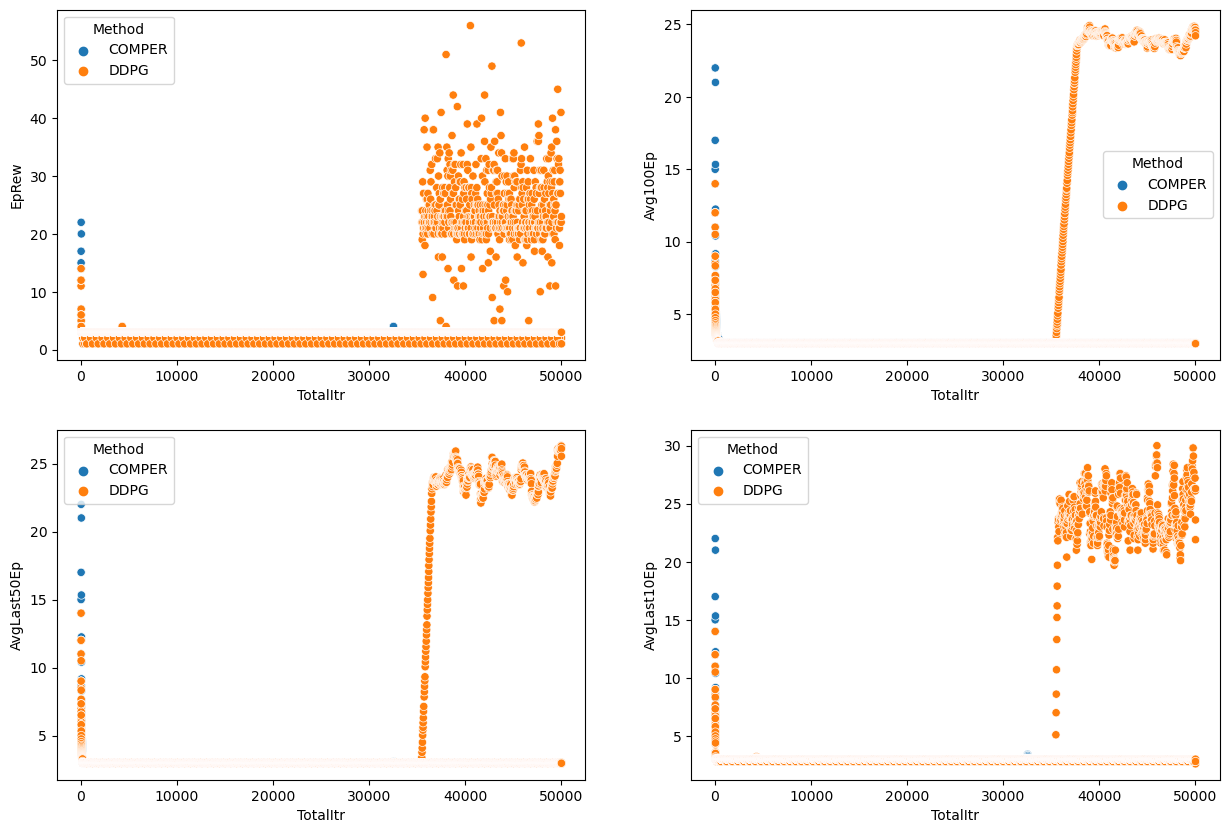

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.scatterplot(data=df, x="TotalItr", y="EpRew", hue="Method",ax=axs[0][0])
sns.scatterplot(data=df, x="TotalItr", y="Avg100Ep", hue="Method",ax=axs[0][1])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast50Ep", hue="Method",ax=axs[1][0])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast10Ep", hue="Method",ax=axs[1][1])

<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

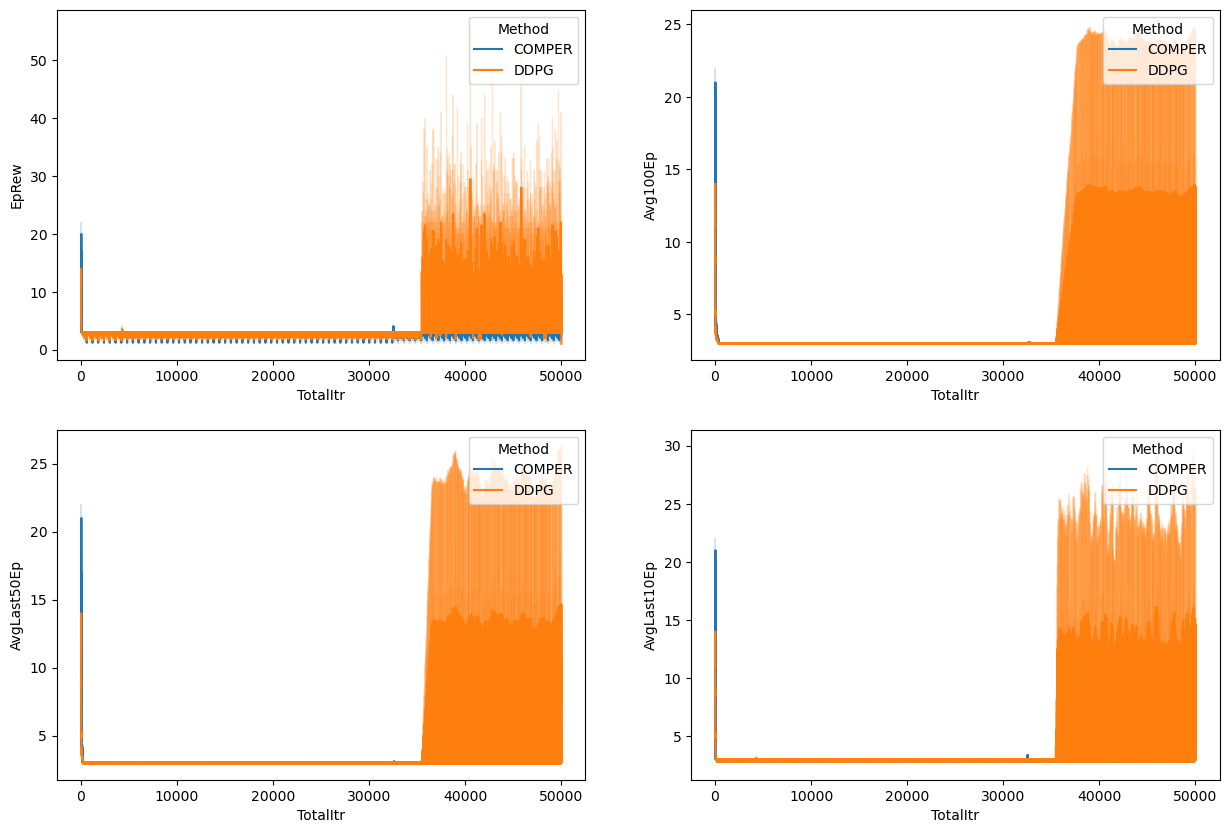

In [11]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [18]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,5,19-06-2023 19:38:47,InvertedPendulum-v4,5000,2,COMPER
1,5,19-06-2023 21:27:09,InvertedPendulum-v4,10000,2,COMPER
2,5,19-06-2023 23:17:13,InvertedPendulum-v4,15000,2,COMPER
3,5,20-06-2023 01:09:39,InvertedPendulum-v4,20000,2,COMPER
4,5,20-06-2023 03:05:08,InvertedPendulum-v4,25000,2,COMPER


In [19]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.0
mean,3.000000,27500.000000,2.0
std,1.428571,14507.211437,0.0
min,1.000000,5000.000000,2.0
25%,2.000000,15000.000000,2.0
50%,3.000000,27500.000000,2.0
75%,4.000000,40000.000000,2.0
max,5.000000,50000.000000,2.0


In [20]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,18-06-2023 12:40:26,InvertedPendulum-v4,5000,2.0,DDPG
1,1,18-06-2023 12:48:16,InvertedPendulum-v4,10000,2.0,DDPG
2,1,18-06-2023 12:56:44,InvertedPendulum-v4,15000,2.0,DDPG
3,1,18-06-2023 13:05:52,InvertedPendulum-v4,20000,2.0,DDPG
4,1,18-06-2023 13:15:38,InvertedPendulum-v4,25000,2.0,DDPG


In [21]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,2.210000
std,1.428571,14507.211437,0.839643
min,1.000000,5000.000000,2.000000
25%,2.000000,15000.000000,2.000000
50%,3.000000,27500.000000,2.000000
75%,4.000000,40000.000000,2.000000
max,5.000000,50000.000000,5.500000


In [16]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

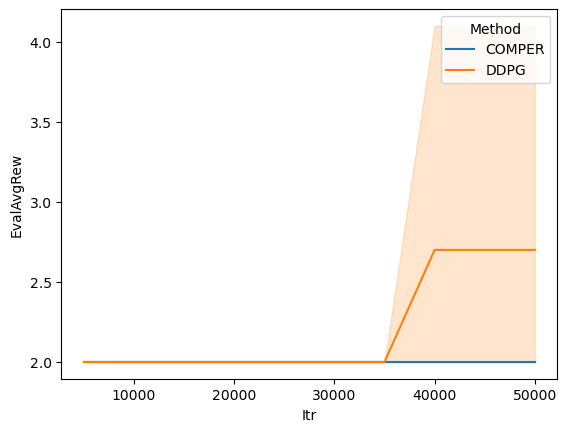

In [17]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')